In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dateutil import parser
import datetime as dt
import seaborn as sns

In [50]:
financial_data = pd.read_csv ('financial_data.csv')
pd.set_option ('display.max_columns', None)
financial_data.head()

,Date,Revenue,Expenses,Profit
0,2023-07-23,6779,9187,-2408
1,2023-11-11,15221,7708,7513
2,2023-12-07,8686,8693,-7
3,2023-05-01,5711,4666,1045
4,2023-01-18,6852,9987,-3135


In [51]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Revenue   1000 non-null   int64 
 2   Expenses  1000 non-null   int64 
 3   Profit    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [52]:
financial_data['Date'] = pd.to_datetime(financial_data['Date'])
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Revenue   1000 non-null   int64         
 2   Expenses  1000 non-null   int64         
 3   Profit    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [53]:
#menghitung statistik deskriptif seperti rata-rata, median, dan deviasi standar untuk setiap kolom

financial_data [['Revenue','Expenses','Profit']].describe(include='all')

,Revenue,Expenses,Profit
count,1000.000000,1000.000000,1000.000000
mean,12311.360000,5979.476000,6331.884000
std,4362.996684,2342.899236,4969.539125
min,5023.000000,2004.000000,-4022.000000
25%,8472.750000,3868.750000,2584.000000
50%,12179.500000,5965.000000,6286.000000
75%,15959.750000,8188.500000,10029.750000
max,19989.000000,9999.000000,17869.000000


In [54]:
financial_data['Month'] = financial_data['Date'].dt.strftime('%B %Y')
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Revenue   1000 non-null   int64         
 2   Expenses  1000 non-null   int64         
 3   Profit    1000 non-null   int64         
 4   Month     1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.2+ KB


In [55]:
financial_data.head()

,Date,Revenue,Expenses,Profit,Month
0,2023-07-23,6779,9187,-2408,July 2023
1,2023-11-11,15221,7708,7513,November 2023
2,2023-12-07,8686,8693,-7,December 2023
3,2023-05-01,5711,4666,1045,May 2023
4,2023-01-18,6852,9987,-3135,January 2023


In [56]:
bulan_urut = {'January 2023': 1, 'February 2023': 2, 'March 2023': 3, 'April 2023': 4,
               'May 2023': 5, 'June 2023': 6, 'July 2023': 7, 'August 2023': 8, 
               'September 2023': 9, 'October 2023': 10, 'November 2023': 11, 'December 2023': 12}

data_finance = financial_data.groupby('Month')[['Revenue','Expenses','Profit']].sum()
data_finance = data_finance.reset_index()
data_finance['Month'] = data_finance['Month'].map(bulan_urut)
# Sort by the new 'Month' column
data_finance = data_finance.sort_values(by='Month')

# Map numeric values back to month names
data_finance['Month'] = data_finance['Month'].map({v: k for k, v in bulan_urut.items()})


# Reset index
data_finance.reset_index(drop=True, inplace=True)

data_finance

,Month,Revenue,Expenses,Profit
0,January 2023,1296287,629845,666442
1,February 2023,971880,463243,508637
2,March 2023,1068769,499683,569086
3,April 2023,1011152,466250,544902
4,May 2023,952889,491328,461561
5,June 2023,735624,368634,366990
6,July 2023,1063433,527562,535871
7,August 2023,984361,480289,504072
8,September 2023,910322,445481,464841
9,October 2023,1085513,489586,595927


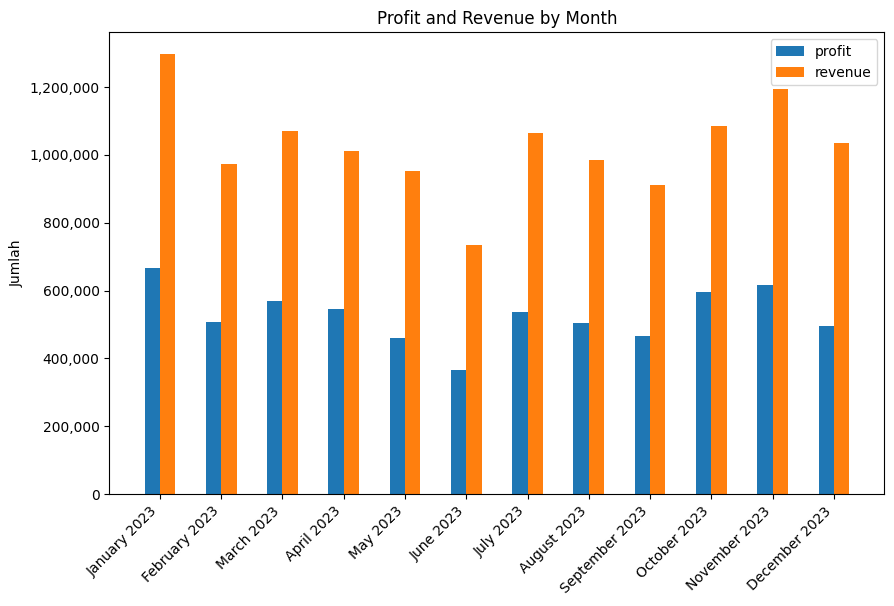

In [79]:
# Data
nama_data = ["profit", "revenue"]
data = {
    'profit': data_finance['Profit'],
    'revenue': data_finance['Revenue']
}

x = np.arange(len(data_finance))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))  # adjust figsize as needed

# Plot each attribute
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah')
ax.set_title('Profit and Revenue by Month')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(data_finance['Month'], rotation=45, ha='right')
ax.legend()

# Set y-axis formatter to display integer values
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.show()


In [58]:


# Menghitung rasio laba terhadap biaya untuk setiap bulan
data_finance['Profit_to_Expenses_Ratio'] = (data_finance['Expenses'] / data_finance['Revenue'])*100
data_finance['persentase_ratio'] = data_finance['Profit_to_Expenses_Ratio'].map('{:.2f}%'.format)

data_finance


,Month,Revenue,Expenses,Profit,Profit_to_Expenses_Ratio,persentase_ratio
0,January 2023,1296287,629845,666442,48.588391,48.59%
1,February 2023,971880,463243,508637,47.664629,47.66%
2,March 2023,1068769,499683,569086,46.753134,46.75%
3,April 2023,1011152,466250,544902,46.110773,46.11%
4,May 2023,952889,491328,461561,51.561934,51.56%
5,June 2023,735624,368634,366990,50.111742,50.11%
6,July 2023,1063433,527562,535871,49.609331,49.61%
7,August 2023,984361,480289,504072,48.791957,48.79%
8,September 2023,910322,445481,464841,48.936640,48.94%
9,October 2023,1085513,489586,595927,45.101809,45.10%


Text(0, 0.5, 'COUNT')

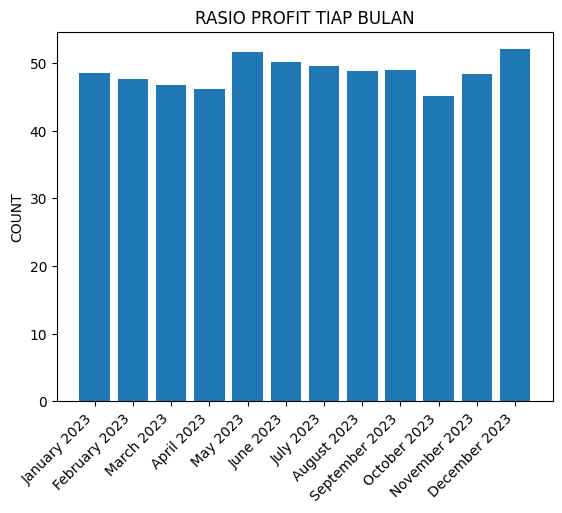

In [59]:
plt.bar(data_finance['Month'], data_finance['Profit_to_Expenses_Ratio'])
plt.title('RASIO PROFIT TIAP BULAN')
plt.xticks(rotation=45, ha='right')
plt.ylabel('COUNT')


Text(0, 0.5, 'PROFIT')

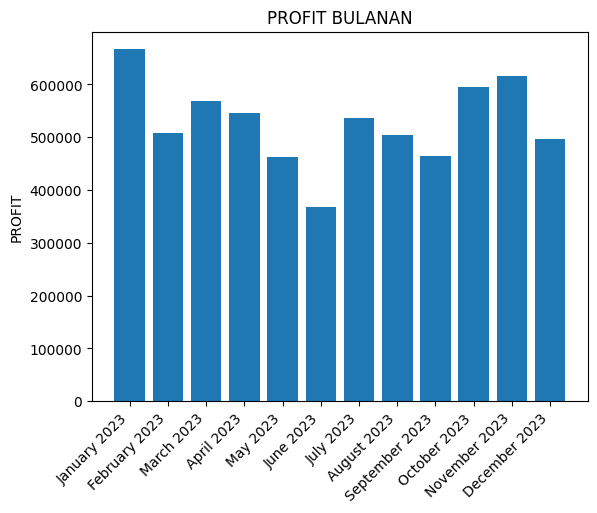

In [60]:
# PROFIT BULANAN
plt.bar(data_finance['Month'], data_finance['Profit'])
plt.title('PROFIT BULANAN')
plt.xticks(rotation=45, ha='right')
plt.ylabel('PROFIT')


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Persiapkan Data

X = data_finance['Expenses'].values.reshape(-1, 1)
y = data_finance['Revenue'].values

# 3. Bagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Bangun Model
model = LinearRegression()

# 5. Latih Model
model.fit(X_train, y_train)

# 6. Evaluasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# 7. Prediksi
new_expenses = np.array([[1000]])  # Ganti nilai biaya yang ingin Anda prediksi
predicted_revenue = model.predict(new_expenses)
print("Predicted Revenue for $1000 Expenses:", predicted_revenue[0])


Mean Squared Error: 3466071919.7332177
R-squared: 0.5321252997645837
Predicted Revenue for $1000 Expenses: 83108.81888191238


In [62]:
data_finance [['Revenue','Profit']].corr()

,Revenue,Profit
Revenue,1.000000,0.966603
Profit,0.966603,1.000000


<Axes: >

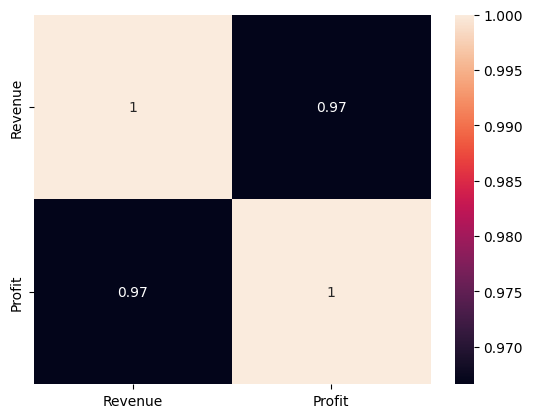

In [63]:
sns.heatmap (data_finance [['Revenue','Profit']].corr(),  annot=True)

In [64]:
filter_data = data_finance[['Month','Revenue','Expenses']]
filter_data.head()

,Month,Revenue,Expenses
0,January 2023,1296287,629845
1,February 2023,971880,463243
2,March 2023,1068769,499683
3,April 2023,1011152,466250
4,May 2023,952889,491328


<Axes: >

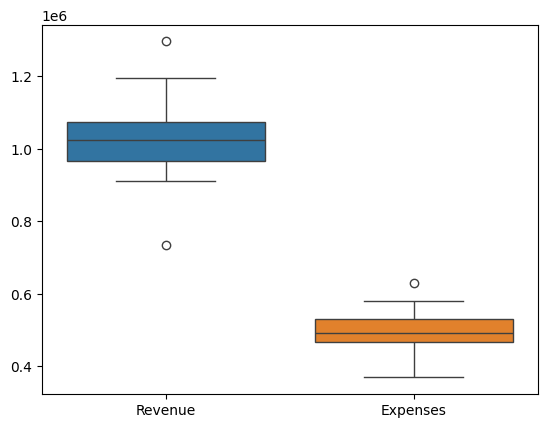

In [65]:
#mencari data outlier
sns.boxplot (filter_data)

In [66]:
#menghitung margin profit tiap bulan
financial_data ['margin_profit'] = ((financial_data ['Revenue'] - financial_data ['Expenses']))/financial_data ['Revenue']*100/100

financial_data.head()

,Date,Revenue,Expenses,Profit,Month,margin_profit
0,2023-07-23,6779,9187,-2408,July 2023,-0.355215
1,2023-11-11,15221,7708,7513,November 2023,0.493594
2,2023-12-07,8686,8693,-7,December 2023,-0.000806
3,2023-05-01,5711,4666,1045,May 2023,0.182980
4,2023-01-18,6852,9987,-3135,January 2023,-0.457531


In [67]:

margin_profit = financial_data.groupby('Month')['margin_profit'].sum()
margin_profit = margin_profit.reset_index()
margin_profit['Month'] = margin_profit['Month'].map(bulan_urut)
# Sort by the new 'Month' column
margin_profit = margin_profit.sort_values(by='Month')

# Map numeric values back to month names
margin_profit['Month'] = margin_profit['Month'].map({v: k for k, v in bulan_urut.items()})
margin_profit['rasio_profit'] = margin_profit['margin_profit'].map('{:.2f}%'.format)

# Reset index
margin_profit.reset_index(drop=True, inplace=True)

margin_profit

,Month,margin_profit,rasio_profit
0,January 2023,46.563989,46.56%
1,February 2023,37.336573,37.34%
2,March 2023,37.312526,37.31%
3,April 2023,36.379671,36.38%
4,May 2023,31.516634,31.52%
5,June 2023,26.134218,26.13%
6,July 2023,36.937533,36.94%
7,August 2023,33.267296,33.27%
8,September 2023,31.091396,31.09%
9,October 2023,41.614564,41.61%


Text(0, 0.5, 'COUNT')

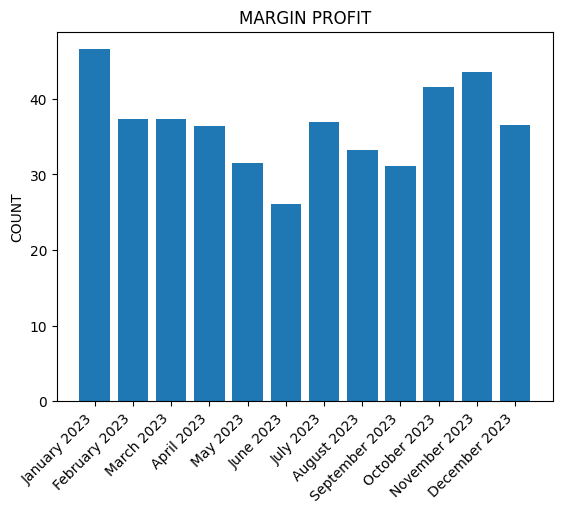

In [68]:
plt.bar(margin_profit['Month'], margin_profit['margin_profit'])
plt.title('MARGIN PROFIT')
plt.xticks(rotation=45, ha='right')
plt.ylabel('COUNT')


C:\Users\ibnu\AppData\Local\Temp\ipykernel_13056\2432457764.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bulan_proyeksi = pd.date_range(start=bulan_terakhir, periods=jumlah_bulan_proyeksi + 1, freq='M').strftime('%b')


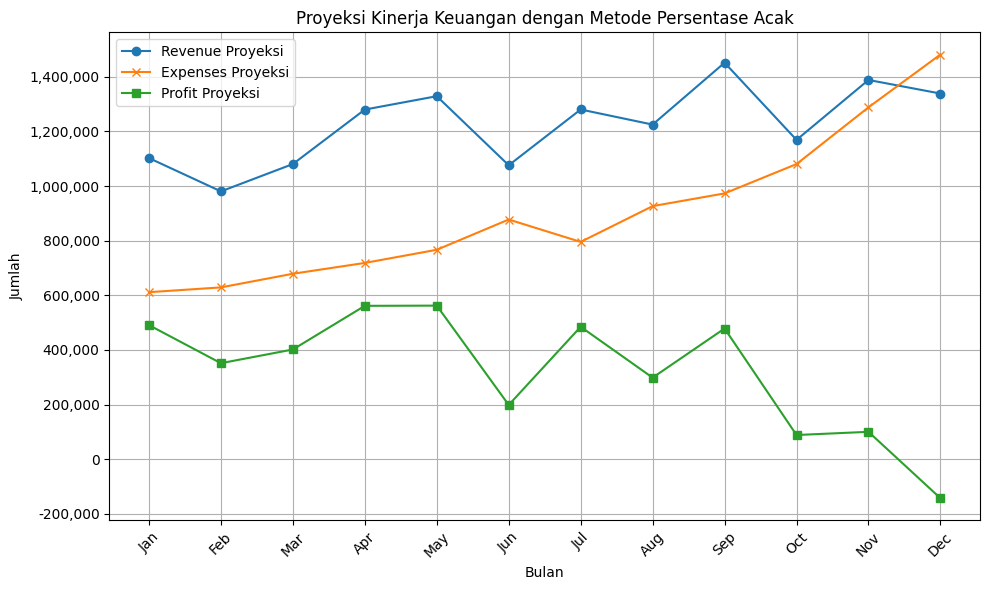

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mengambil nilai terakhir dari data historis
revenue_terakhir = data_finance['Revenue'].iloc[-1]
expenses_terakhir = data_finance['Expenses'].iloc[-1]
profit_terakhir = data_finance['Profit'].iloc[-1]
bulan_terakhir = data_finance['Month'].iloc[-1]

# Jumlah bulan yang akan diproyeksikan
jumlah_bulan_proyeksi = 12

# Menghasilkan pertumbuhan persentase acak untuk setiap bulan
pertumbuhan_revenue = np.random.uniform(low=-0.2, high=0.2, size=jumlah_bulan_proyeksi)
pertumbuhan_expenses = np.random.uniform(low=-0.2, high=0.2, size=jumlah_bulan_proyeksi)

# Proyeksi menggunakan metode persentase acak
revenue_proyeksi = [revenue_terakhir]
expenses_proyeksi = [expenses_terakhir]
profit_proyeksi = [profit_terakhir]

for i in range(jumlah_bulan_proyeksi):
    revenue_proyeksi.append(revenue_proyeksi[-1] * (1 + pertumbuhan_revenue[i]))
    expenses_proyeksi.append(expenses_proyeksi[-1] * (1 + pertumbuhan_expenses[i]))
    profit_proyeksi.append(revenue_proyeksi[-1] - expenses_proyeksi[-1])

# Menghasilkan bulan untuk proyeksi
bulan_proyeksi = pd.date_range(start=bulan_terakhir, periods=jumlah_bulan_proyeksi + 1, freq='M').strftime('%b')

# Memvisualisasikan proyeksi
plt.figure(figsize=(10, 6))
plt.plot(bulan_proyeksi[1:], revenue_proyeksi[1:], label='Revenue Proyeksi', marker='o')
plt.plot(bulan_proyeksi[1:], expenses_proyeksi[1:], label='Expenses Proyeksi', marker='x')
plt.plot(bulan_proyeksi[1:], profit_proyeksi[1:], label='Profit Proyeksi', marker='s')

plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Proyeksi Kinerja Keuangan dengan Metode Persentase Acak')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Mengatur format sumbu y menjadi bilangan bulat
plt.tight_layout()
plt.show()
